<a href="https://colab.research.google.com/github/Canchili/-/blob/main/____3_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pandas seaborn scikit-learn

# Домашнее задание 3

1. Выбрать номинальное значение как целевую переменную
2. Провести разведочный анализ **включая** анализ зависимости между номинальными переменными (chi2)
3. Выбрать `best_features`
4. Сделать нормализацию данных (scaler, onehotencoding)
4. Обучить модель логистической регрессии
5. Вывести метрики качества, описать полученный результат (также вывести коэфициенты модели)

In [2]:
import pandas as pd

In [4]:
df = pd.read_csv("/content/Customers.csv")

In [5]:
df["Gender"] = df["Gender"].astype("category")
df["Profession"] = df["Profession"].astype("category")

In [6]:
# выбрать целевую переменную и разделить на X, y
# целевая переменная - номинальное значение

y = df["Gender"]
X = df.drop("Gender", axis=1)
print(y.head())
print(X.head())

0      Male
1      Male
2    Female
3    Female
4    Female
Name: Gender, dtype: category
Categories (2, object): ['Female', 'Male']
   CustomerID  Age  Annual Income ($)  Spending Score (1-100)     Profession  \
0           1   19              15000                      39     Healthcare   
1           2   21              35000                      81       Engineer   
2           3   20              86000                       6       Engineer   
3           4   23              59000                      77         Lawyer   
4           5   31              38000                      40  Entertainment   

   Work Experience  Family Size  
0                1            4  
1                3            3  
2                1            1  
3                0            2  
4                2            6  


In [7]:
#заполняем пропуски
from sklearn.impute import SimpleImputer

imputer_cat = SimpleImputer(strategy='most_frequent')

imputed = imputer_cat.fit_transform(df[['Profession']])

df['Profession'] = pd.Series(imputed.flatten(), index=df.index)
print(df.isnull().sum())

CustomerID                0
Gender                    0
Age                       0
Annual Income ($)         0
Spending Score (1-100)    0
Profession                0
Work Experience           0
Family Size               0
dtype: int64


### EDA

Целевая **переменная**

Gender
Female    1186
Male       814
Name: count, dtype: int64
Gender
Female    0.593
Male      0.407
Name: proportion, dtype: float64


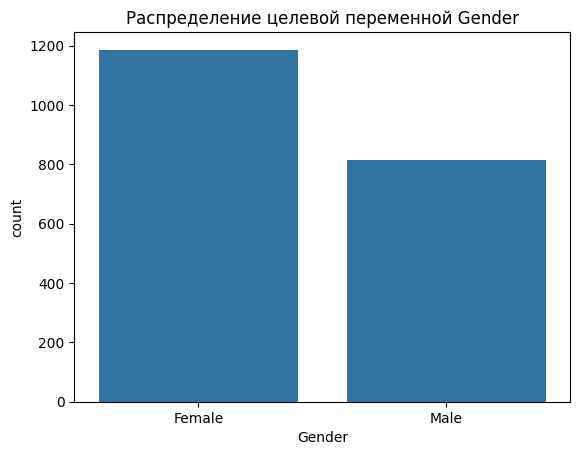

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

#распределение классов
print(y.value_counts())
print(y.value_counts(normalize=True)) #Распределение классов в долях

sns.countplot(x=y)
plt.title('Распределение целевой переменной Gender')
plt.show()

Видно что женщины преобладают

Категориальная переменная

In [9]:
# подсчитывает, сколько мужчин и женщин приходится на каждую профессию
table = pd.crosstab(df['Gender'], df['Profession'])
table


Profession,Artist,Doctor,Engineer,Entertainment,Executive,Healthcare,Homemaker,Lawyer,Marketing
Gender,,,,,,,,,
Female,400,89,103,133,87,196,39,86,53
Male,247,72,76,101,66,143,21,56,32


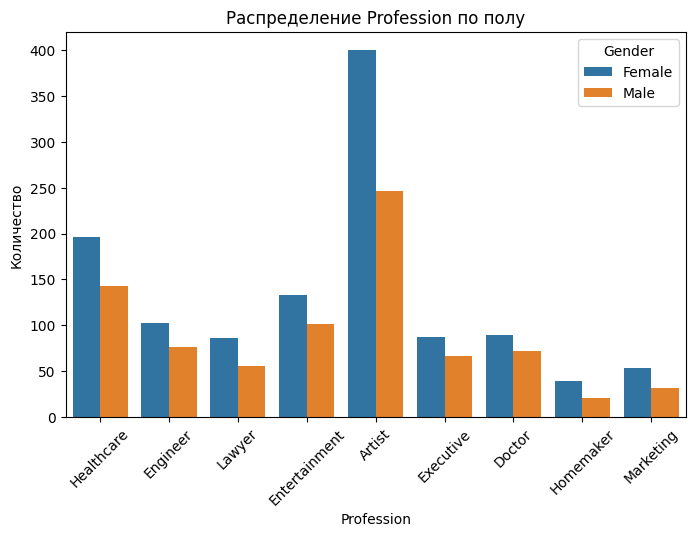

χ² = 5.52
p-value = 0.7010205240158921


In [10]:
from scipy.stats import chi2_contingency

plt.figure(figsize=(8,5))
sns.countplot(x='Profession', data=df, hue='Gender')
plt.title('Распределение Profession по полу')
plt.xlabel('Profession')
plt.ylabel('Количество')
plt.xticks(rotation=45)
plt.show()

chi2, p, dof, expected = chi2_contingency(table)
print(f"χ² = {chi2:.2f}")
print(f"p-value = {p}")

χ² (хи-квадрат) — проверка наличия зависимости(измеряет «расстояние» или разницу между реальными наблюдениями и ожидаемыми значениями, которые были бы при отсутствии зависимости между данными.)

P-значение помогает понять, являются ли эти различия случайными или статистически значимыми.


Интерпретация:

p < 0.05 → зависимость есть (значимая)

p ≥ 0.05 → зависимость не доказана

следоватнльно зависимости нет

/tmp/ipython-input-1156416888.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('Gender')[['Age', 'Annual Income ($)', 'Spending Score (1-100)', 'Work Experience', 'Family Size']].describe()


         count       mean        std  min   25%   50%   75%   max
Gender                                                           
Female  1186.0  48.822934  28.263988  0.0  25.0  48.0  72.0  99.0
Male     814.0  49.159705  28.685795  0.0  24.0  48.0  74.0  99.0


/tmp/ipython-input-1156416888.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(df.groupby("Gender")[col].describe())


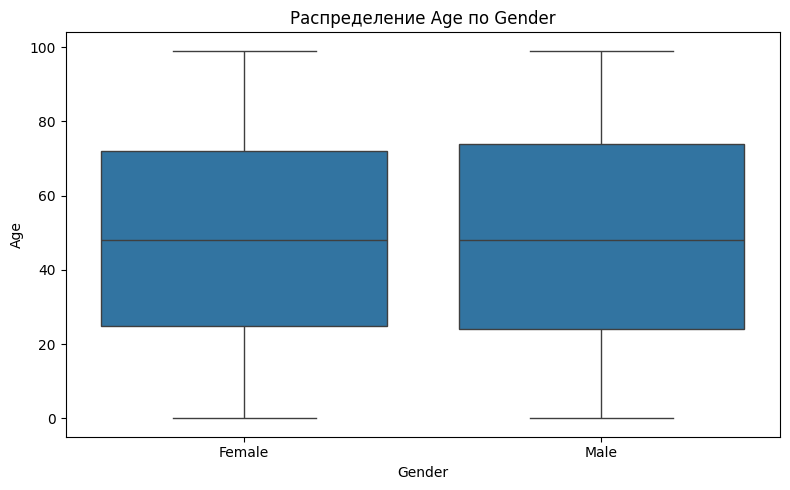

/tmp/ipython-input-1156416888.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(df.groupby("Gender")[col].describe())


         count           mean           std     min       25%       50%  \
Gender                                                                    
Female  1186.0  110553.715008  45883.436382  1000.0  73135.50  111174.0   
Male     814.0  110991.323096  45555.982548     0.0  76913.75  108055.0   

              75%       max  
Gender                       
Female  148733.75  189974.0  
Male    149536.25  189945.0  


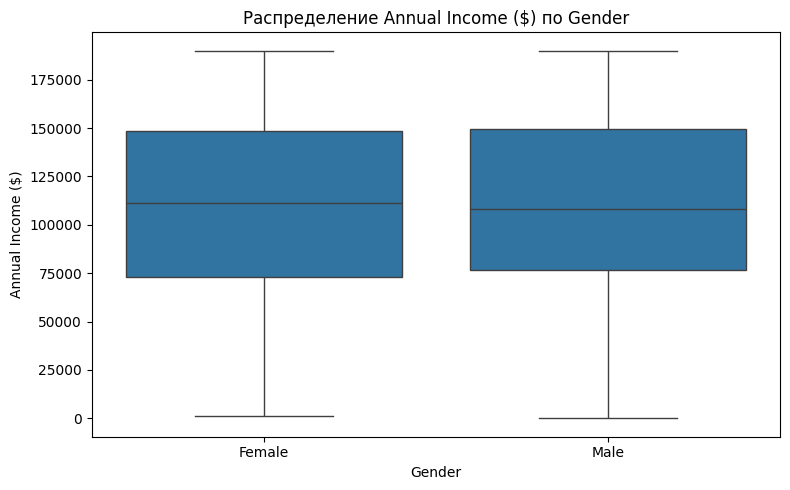

/tmp/ipython-input-1156416888.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(df.groupby("Gender")[col].describe())


         count       mean        std  min   25%   50%   75%    max
Gender                                                            
Female  1186.0  50.974705  28.032580  0.0  28.0  50.0  75.0  100.0
Male     814.0  50.944717  27.808573  1.0  28.0  51.0  75.0  100.0


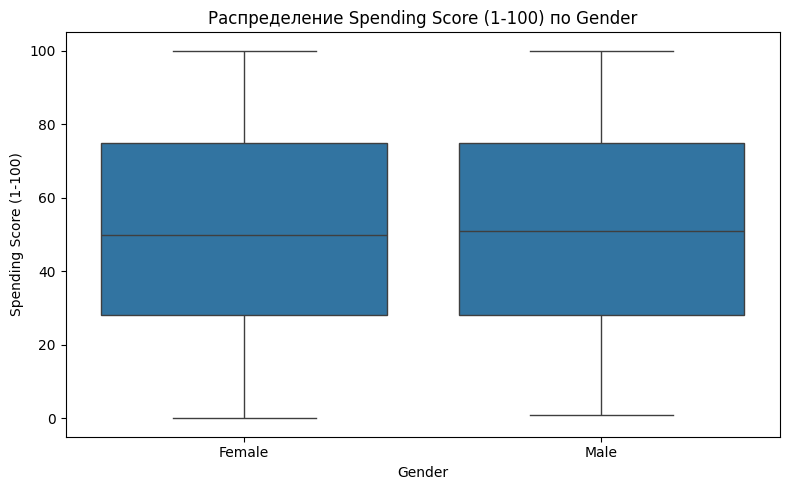

/tmp/ipython-input-1156416888.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(df.groupby("Gender")[col].describe())


         count      mean       std  min  25%  50%  75%   max
Gender                                                      
Female  1186.0  4.035413  3.884896  0.0  1.0  3.0  7.0  17.0
Male     814.0  4.200246  3.976307  0.0  1.0  3.5  8.0  17.0


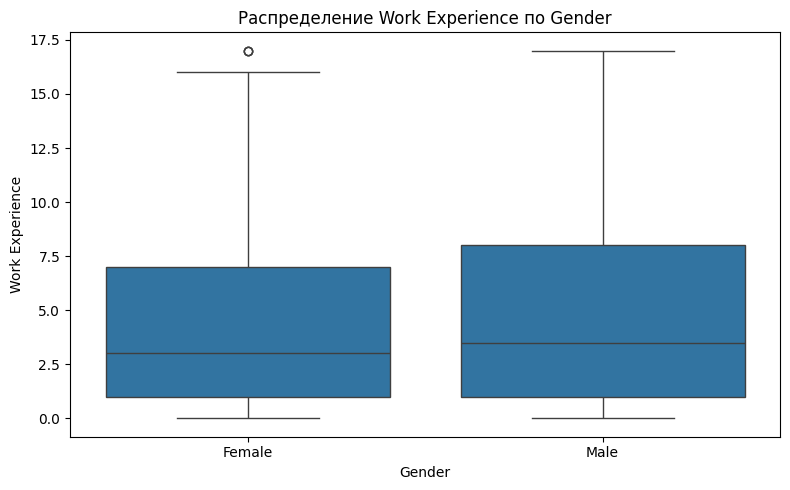

/tmp/ipython-input-1156416888.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(df.groupby("Gender")[col].describe())


         count      mean       std  min  25%  50%  75%  max
Gender                                                     
Female  1186.0  3.768128  1.976494  1.0  2.0  4.0  5.0  8.0
Male     814.0  3.769042  1.963561  1.0  2.0  4.0  5.0  9.0


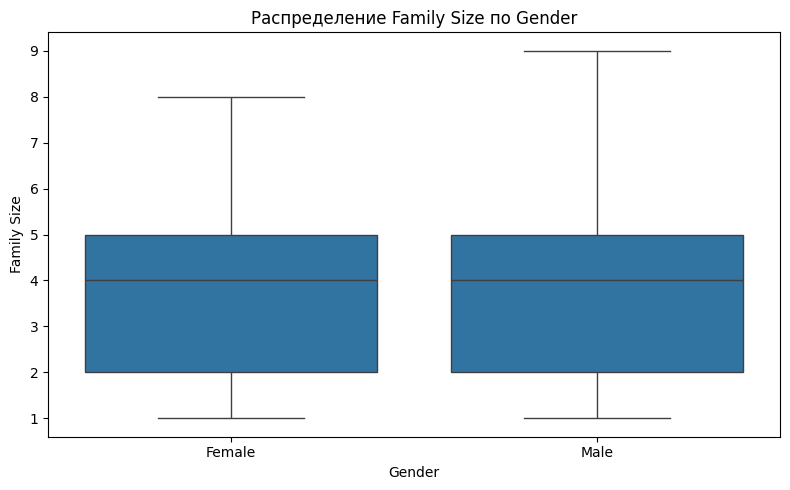

Корреляция числовых признаков с полом (Gender_num):
Gender_num                1.000000
Work Experience           0.020651
Age                       0.005821
Annual Income ($)         0.004701
Family Size               0.000228
Spending Score (1-100)   -0.000528
Name: Gender_num, dtype: float64


In [11]:
df.groupby('Gender')[['Age', 'Annual Income ($)', 'Spending Score (1-100)', 'Work Experience', 'Family Size']].describe()

numerical_cols = ['Age', 'Annual Income ($)', 'Spending Score (1-100)', 'Work Experience', 'Family Size']

for col in numerical_cols:
    plt.figure(figsize=(8,5))
    sns.boxplot(x='Gender', y=col, data=df)
    plt.title(f'Распределение {col} по Gender')

    plt.tight_layout()
    plt.subplots_adjust(hspace=0.4)
    print(df.groupby("Gender")[col].describe())
    plt.show()

# Корреляция числовых признаков с полом (для этого пол нужно численно закодировать)
df['Gender_num'] = df['Gender'].astype('category').cat.codes

corr = df[numerical_cols + ['Gender_num']].corr()
print("Корреляция числовых признаков с полом (Gender_num):")
print(corr['Gender_num'].sort_values(ascending=False))

Если смотреть по метрикам, то они все -+ схожи
Корреляция близка к нулю ил отрицательна поэтому зависимось слабая, наиболее большая только у Work Experience

In [12]:
best_features = ['Profession', 'Age', 'Work Experience', 'Family Size', 'Annual Income ($)', 'Spending Score (1-100)']

Исходя из анализа, можно сказать что все кандидаты на best_features не очень хорошие, поэтому попробуем обучить модель на всех переменных

### Model

Нормализация

In [17]:
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
import numpy as np
# Выбираем числовые признаки
numerical_cols = ['Age', 'Annual Income ($)', 'Spending Score (1-100)', 'Work Experience', 'Family Size']
categorical_cols = ['Profession']

# Целевая переменная
y = df['Gender']
X = df[best_features]

# Исходные данные
print("Числовые признаки до нормализации:")
print(df[numerical_cols].head())

# Трансформеры для признаков
preprocessor = ColumnTransformer(
    transformers=[
        ('num', MinMaxScaler(), numerical_cols),
        ('cat', OneHotEncoder(drop='first', sparse_output=False), categorical_cols)
    ])

X_scaled = preprocessor.fit_transform(X)

# Получаем имена признаков после OneHot кодирования
encoded_cat_cols = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_cols)
all_features = numerical_cols + list(encoded_cat_cols)

# Преобразуем X_scaled в DataFrame с именами колонок
normalized_df = pd.DataFrame(X_scaled, columns=all_features, index=df.index)

print("\nЧисловые признаки после нормализации:")
print(normalized_df.head())

print("До нормализации:", X.shape)
print("После нормализации:", X_scaled.shape)


Числовые признаки до нормализации:
   Age  Annual Income ($)  Spending Score (1-100)  Work Experience  \
0   19              15000                      39                1   
1   21              35000                      81                3   
2   20              86000                       6                1   
3   23              59000                      77                0   
4   31              38000                      40                2   

   Family Size  
0            4  
1            3  
2            1  
3            2  
4            6  

Числовые признаки после нормализации:
        Age  Annual Income ($)  Spending Score (1-100)  Work Experience  \
0  0.191919           0.078958                    0.39         0.058824   
1  0.212121           0.184236                    0.81         0.176471   
2  0.202020           0.452694                    0.06         0.058824   
3  0.232323           0.310569                    0.77         0.000000   
4  0.313131           0.2000

Нормализация данных нужна для того, чтобы привести все признаки к единому масштабу и сделать их замкнутыми.

Когда признаки сильно различаются по масштабу, это может привести к тому, что алгоритмы машинного обучения будут «преимущественно» ориентироваться на признаки с выявленными значениями, исключая я небольшие значения.

**Обучение**

In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)
# Обучение
model =Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000, penalty=None, random_state=42))])

model.fit(X_train, y_train)

# Предсказания
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)


# Метрики для оценки
def evaluate_classification(y_true, y_pred, y_proba=None):
    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred, average='weighted', zero_division=0)
    rec = recall_score(y_true, y_pred, average='weighted', zero_division=0)
    f1 = f1_score(y_true, y_pred, average='weighted', zero_division=0)

    roc_auc = None
    if y_proba is not None:
        classes = np.unique(y_true)
        y_true_onehot = np.eye(len(classes))[np.searchsorted(classes, y_true)]
        roc_auc = roc_auc_score(y_true_onehot, y_proba, multi_class='ovr')

    cm = confusion_matrix(y_true, y_pred)

    print("Метрики классификации")
    print(f"Accuracy:  {acc:.4f}")
    print(f"Precision: {prec:.4f}")
    print(f"Recall:    {rec:.4f}")
    print(f"F1-score:  {f1:.4f}")
    if roc_auc is not None:
        print(f"ROC-AUC:   {roc_auc:.4f}")
    print("\nConfusion Matrix:")
    print(cm)

# Вывод метрик
evaluate_classification(y_test, y_pred, y_proba)


Метрики классификации
Accuracy:  0.5817
Precision: 0.4787
Recall:    0.5817
F1-score:  0.4529
ROC-AUC:   0.4519

Confusion Matrix:
[[343  13]
 [238   6]]


Accuracy: = 0,5817 — примерно 58% объектов классифицированы правильно.(доля правильно классифицированных объектов ко всем объектам. Хорошо показывает общее качество)

Precision =	0.4787 - мало точности среди предсказанных +(доля объектов, предсказанных положительными, которые действительно положительны. Важна, если ложноположительные ошибки критичны.)

Recall = 0.5817 -	найдено около 58% реальных + примеров, это средний результат, но его недостаточно (оля реальных положительных объектов, корректно предсказанных моделью)

F1-score = 0,4529 — среднее гармоничное соотношение точности и полноты, довольно низкое, что свидетельствует о слабой сбалансированности.

ROC-AUC = 0,4519 — ниже 0,5, что указывает на плохую способность различать классы вероятностей.

Матрица

Модель хорошо классифицирует объекты первого класса (343 + 13), но хуже второго (всего 6 верных и 238 ошибок), что может говорить о дисбалансе классов или недостаточной выразительности признаков.

In [ ]:
#Коэффициенты модели логистической регрессии
#Извлекаем преобразователь
preprocessor = model.named_steps['preprocessor']

# Получаем имена признаков после OneHotEncoding
encoded_cat_cols = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_cols)

# Полный список признаков после преобразования
feature_names = numerical_cols + list(encoded_cat_cols)

# Извлекаем обученную модель
logreg = model.named_steps['classifier']

# Коэффициенты модели
coefficients = logreg.coef_[0]

# Выводим в удобочитаемом виде
for feature, coef in zip(feature_names, coefficients):
    print( f"{feature}: {coef:.4f}")

Age: 0.2001
Annual Income ($): 0.1593
Spending Score (1-100): 0.0049
Work Experience: 0.1168
Family Size: -0.1169
Profession_Doctor: 0.4557
Profession_Engineer: 0.2076
Profession_Entertainment: 0.5077
Profession_Executive: 0.1927
Profession_Healthcare: 0.2942
Profession_Homemaker: -0.4575
Profession_Lawyer: 0.1619
Profession_Marketing: 0.1624


Самые сильные положительные влияния оказывают профессии Entertainment (0.5077), Doctor (0.4557), Healthcare (0.2942).

Отрицательное влияние у профессии Homemaker (-0.4575) и Family Size (-0.1169).

Возраст и доход тоже положительно влияют, но меньше (0.2 и 0.16).

**Вывод:**

Модель средне справляется с задачей и показывает тенденции по некоторым признакам — профессия и базовые числовые характеристики влияют на предсказание, но минимально. Однако низкие метрики f1 и roc-auc говорят о том, что модель либо недообучена, либо признаки недостаточно информативны.